<a href="https://colab.research.google.com/github/PratikhyaManas/TensorRT/blob/master/TensorRT_Model_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read the input image

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import the needed libraries
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.contrib.tensorrt as trt # must import this although we will not use it explicitly
from tensorflow.python.platform import gfile
from PIL import Image
import numpy as np
import time
from matplotlib import pyplot as plt

# read the testing images (only for example)

img1= Image.open("/content/drive/My Drive/ML_Datasets/nvidia/mnist/img_0.jpg")
img2= Image.open("/content/drive/My Drive/ML_Datasets/nvidia/mnist/img_108.jpg")
img1 = np.asarray(img1)
img2 = np.asarray(img2)
input_img = np.concatenate((img1.reshape((1, 28, 28, 1)), 
                            img2.reshape((1, 28, 28, 1))
                            ), 
                           axis=0)

### Function to read ".pb" model (TensorRT model is stored in ".pb")

In [0]:
# function to read a ".pb" model 
# (can be used to read frozen model or TensorRT model)
def read_pb_graph(model):
  with gfile.FastGFile(model,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
  return graph_def

### Perform inference using TensorRT model

In [74]:
# variable
TENSORRT_MODEL_PATH = '/content/drive/My Drive/ML_Datasets/nvidia/model/TensorRT_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.50))) as sess:
        # read TensorRT model
        trt_graph = read_pb_graph(TENSORRT_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(trt_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_tensorRT = total_time / n_time_inference
        print("average inference time: ", avg_time_tensorRT)

needed time in inference-0:  0.0013720989227294922
needed time in inference-1:  0.0014812946319580078
needed time in inference-2:  0.0012173652648925781
needed time in inference-3:  0.0012531280517578125
needed time in inference-4:  0.001216888427734375
needed time in inference-5:  0.0012154579162597656
needed time in inference-6:  0.0011289119720458984
needed time in inference-7:  0.0012259483337402344
needed time in inference-8:  0.0013017654418945312
needed time in inference-9:  0.001007080078125
needed time in inference-10:  0.0011546611785888672
needed time in inference-11:  0.0010271072387695312
needed time in inference-12:  0.0011091232299804688
needed time in inference-13:  0.001220703125
needed time in inference-14:  0.0012843608856201172
needed time in inference-15:  0.001209259033203125
needed time in inference-16:  0.001149892807006836
needed time in inference-17:  0.0013244152069091797
needed time in inference-18:  0.001092672348022461
needed time in inference-19:  0.00110

### Perform inference using the original tensorflow model

In [75]:
# variable
FROZEN_MODEL_PATH = '/content/drive/My Drive/ML_Datasets/nvidia/model/frozen_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session() as sess:
        # read TensorRT model
        frozen_graph = read_pb_graph(FROZEN_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(frozen_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_original_model = total_time / n_time_inference
        print("average inference time: ", avg_time_original_model)
        print("TensorRT improvement compared to the original model:", avg_time_original_model/avg_time_tensorRT)

needed time in inference-0:  0.0011343955993652344
needed time in inference-1:  0.0013349056243896484
needed time in inference-2:  0.0012693405151367188
needed time in inference-3:  0.0011720657348632812
needed time in inference-4:  0.0011017322540283203
needed time in inference-5:  0.0012035369873046875
needed time in inference-6:  0.001096487045288086
needed time in inference-7:  0.0010943412780761719
needed time in inference-8:  0.0011167526245117188
needed time in inference-9:  0.0012805461883544922
needed time in inference-10:  0.0012273788452148438
needed time in inference-11:  0.001070261001586914
needed time in inference-12:  0.001096963882446289
needed time in inference-13:  0.0012536048889160156
needed time in inference-14:  0.0010793209075927734
needed time in inference-15:  0.001192331314086914
needed time in inference-16:  0.0010187625885009766
needed time in inference-17:  0.00099945068359375
needed time in inference-18:  0.00115966796875
needed time in inference-19:  0.0

### Plot the prediction result

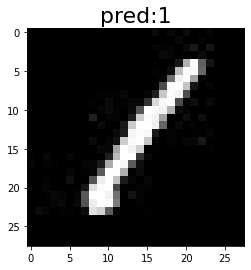

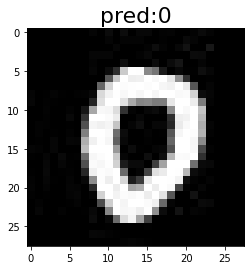

In [76]:
# plot the prediction output
plt.figure('img 1')
plt.imshow(img1, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[0])), fontsize=22)

plt.figure('img 2')
plt.imshow(img2, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[1])), fontsize=22)

plt.show()